In [59]:
#importing packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno

In [60]:
data=pd.read_csv('fifadataset.csv',index_col=0) #Loading the given data set

In [61]:
data.head(3) 

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [62]:
data.info() #Information about data set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null 

In [63]:
## Replacing Preferred Foot with Preferred_Foot
data = data.rename(columns={'Preferred Foot': 'Preferred_Foot'})

In [64]:
data.describe() #more information about continuos variable.

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


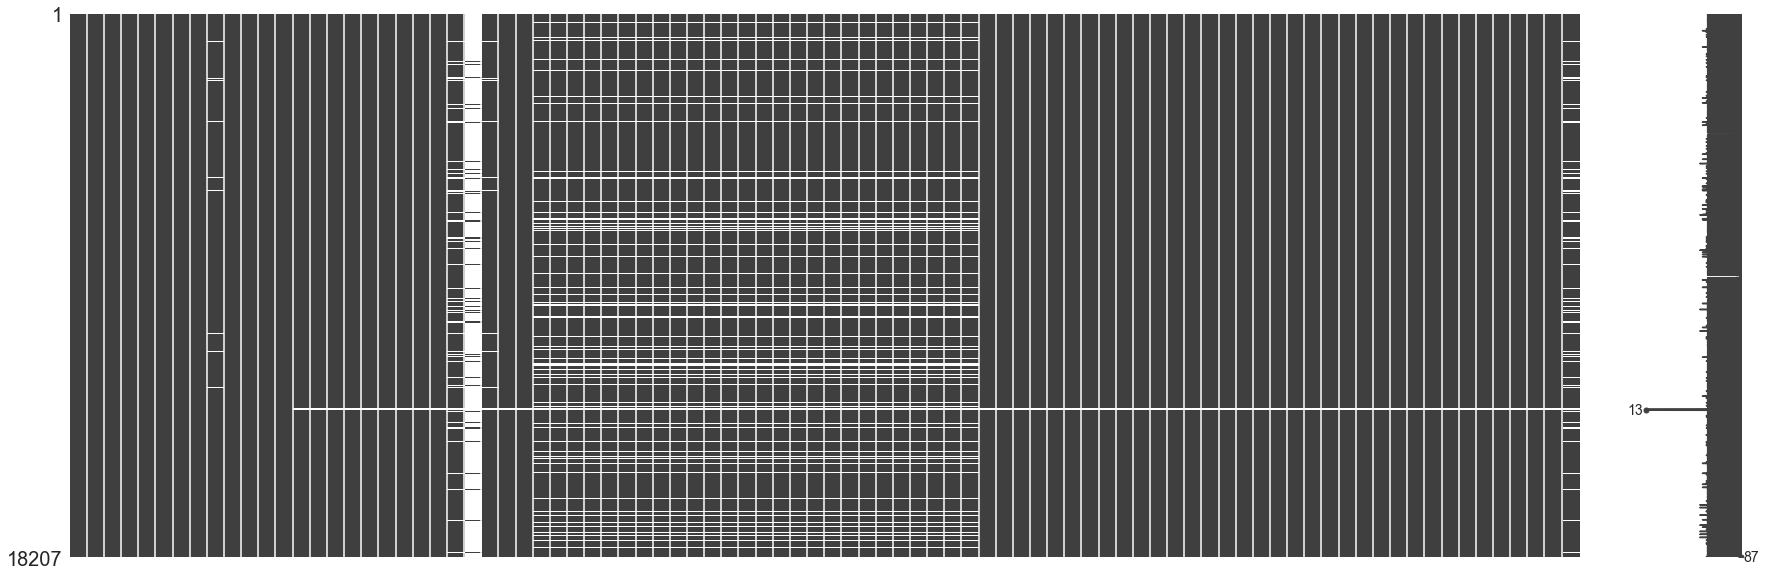

In [65]:
#plot for missing values
missingno.matrix(data, figsize = (30,10))

In [66]:
# Alternatively, you can see the number of missing values like this
data.isnull().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred_Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST                           2085
RS            

In [52]:
# unique value counts according to the nation
data.Nationality.value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
Brazil                   827
Italy                    702
Colombia                 618
Japan                    478
Netherlands              453
Sweden                   397
China PR                 392
Chile                    391
Republic of Ireland      368
Mexico                   366
United States            353
Poland                   350
Norway                   341
Saudi Arabia             340
Denmark                  336
Korea Republic           335
Portugal                 322
Turkey                   303
Austria                  298
Scotland                 286
Belgium                  260
Australia                236
Switzerland              220
Uruguay                  149
Senegal                  130
                        ... 
Hong Kong                  2
Bermuda                    2
Eritrea                    2
Nicaragua     

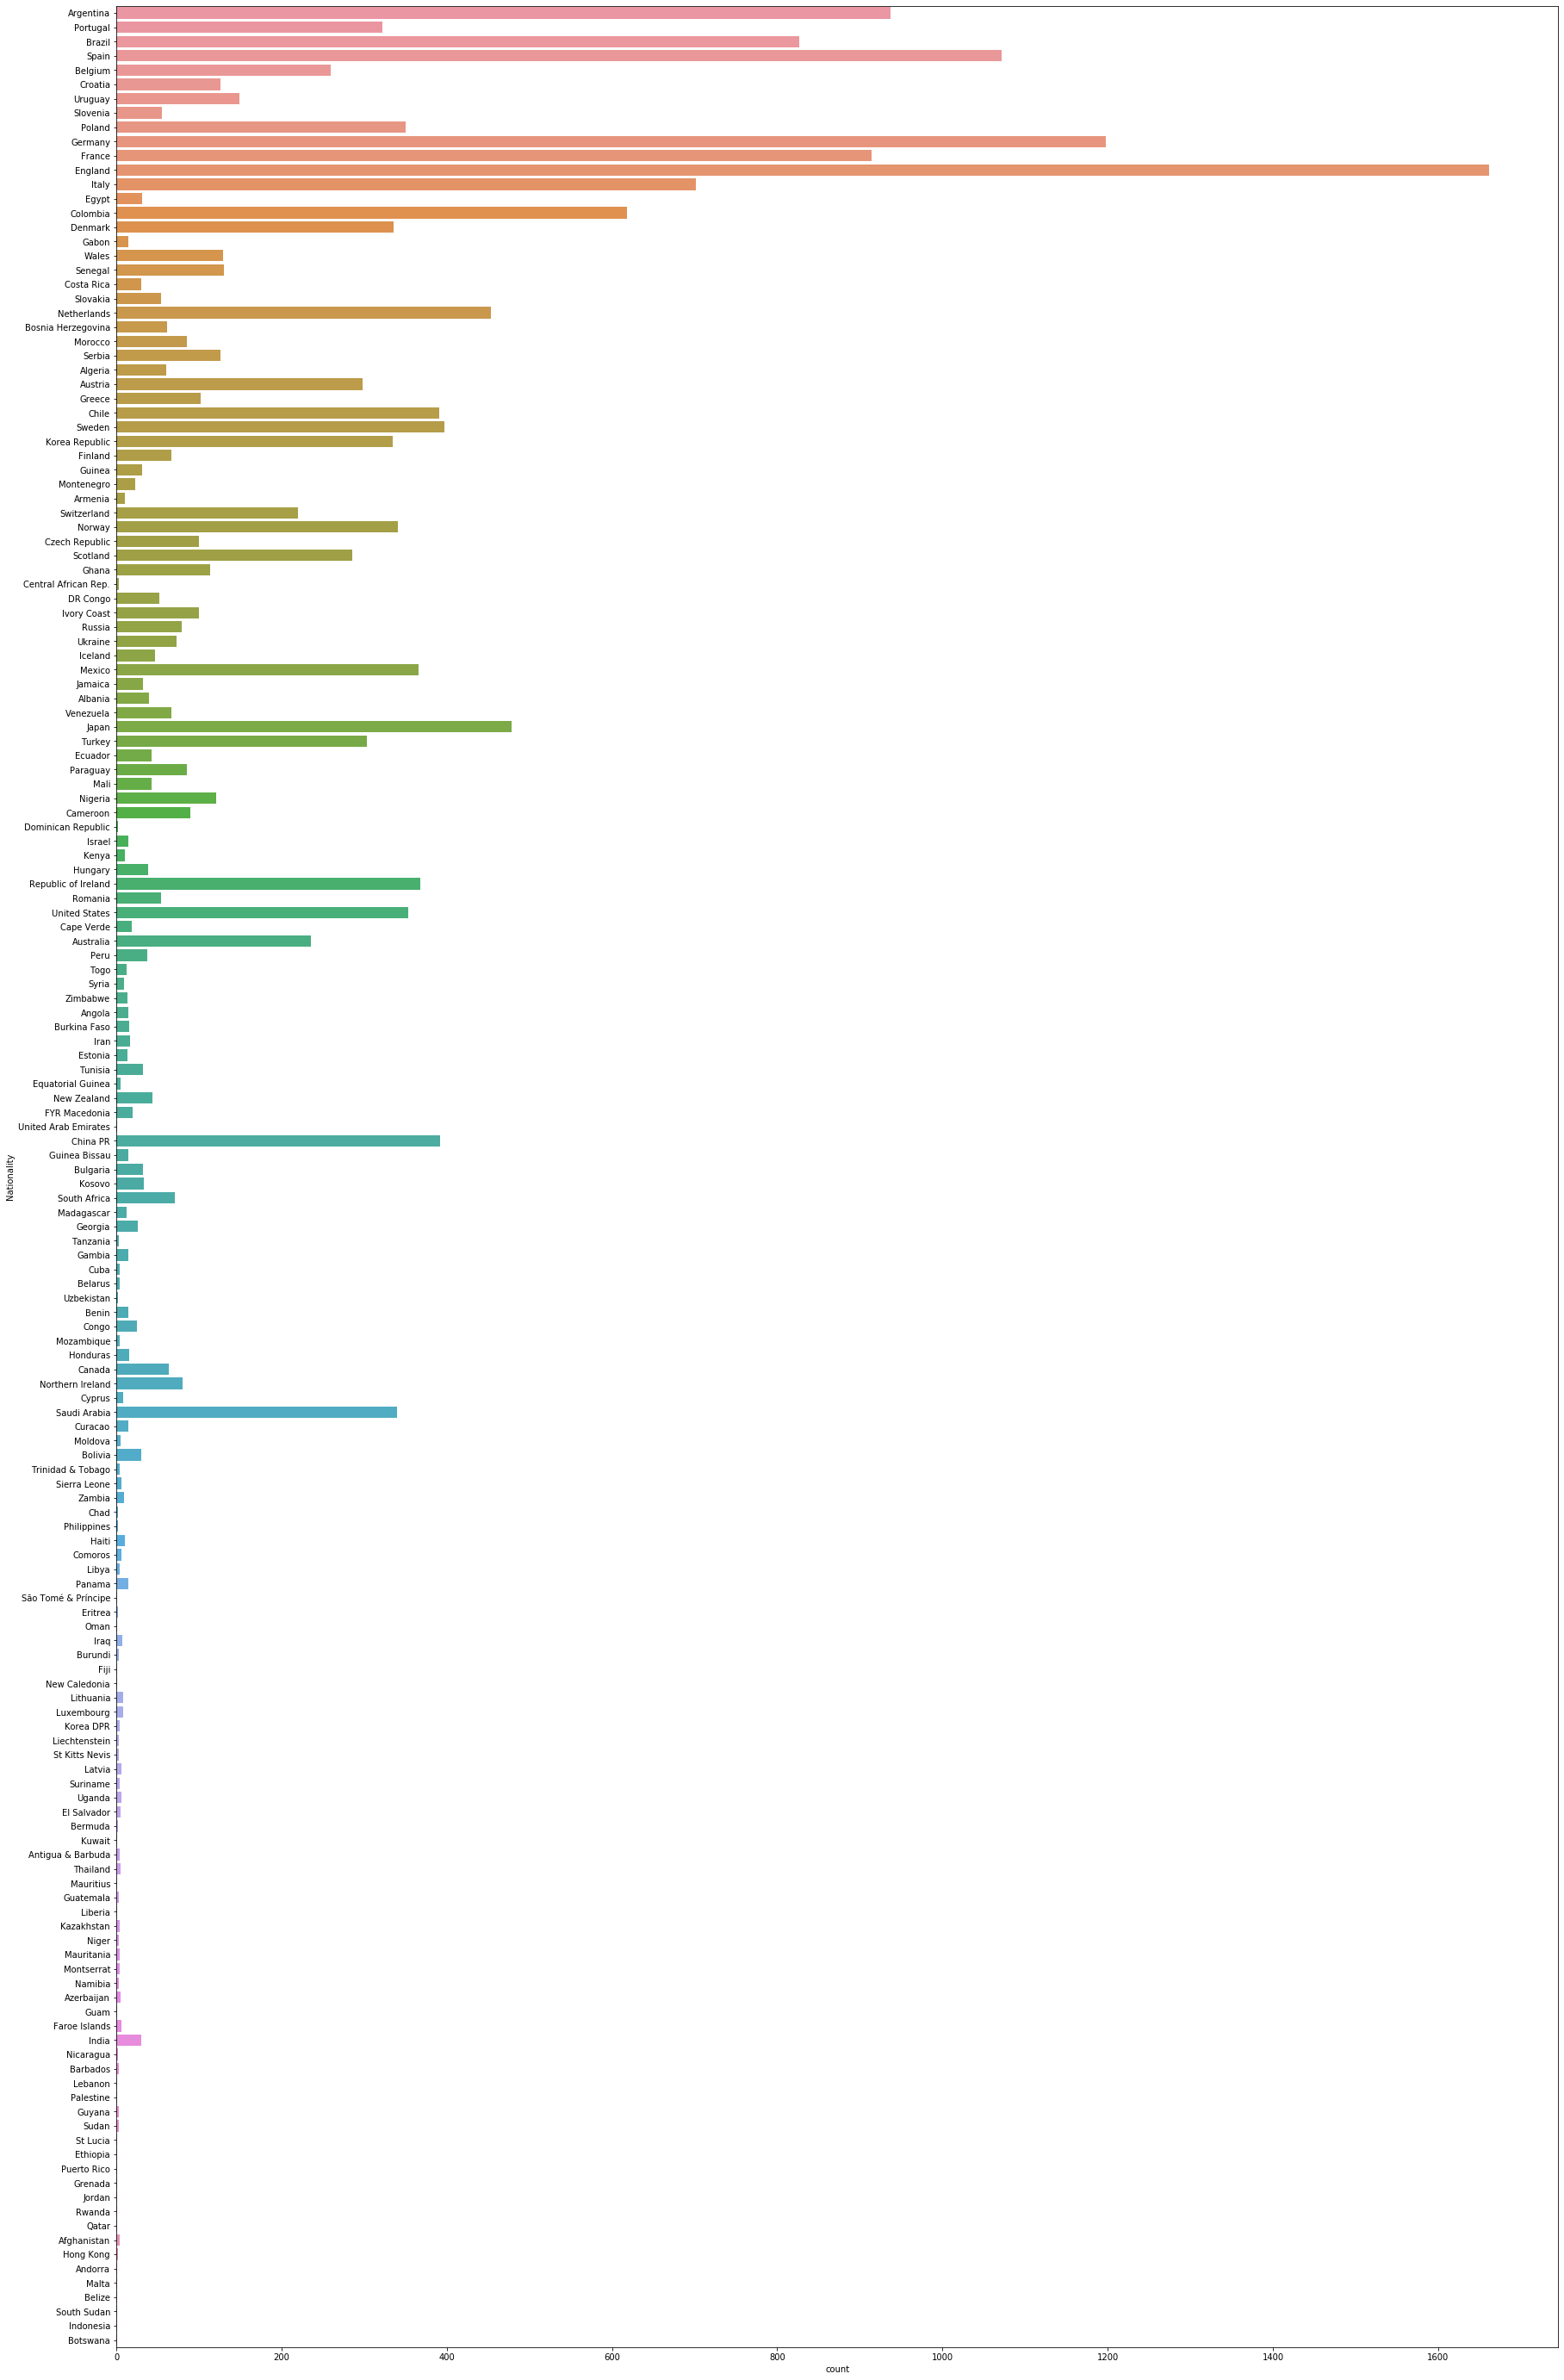

In [53]:
#Nationality distribution 
fig = plt.figure(figsize=(30,50))
sns.countplot(y='Nationality', data=data);

In [54]:
data.duplicated(subset=None, keep='first').sum() #checking whether there is duplicate entry in data set.

0

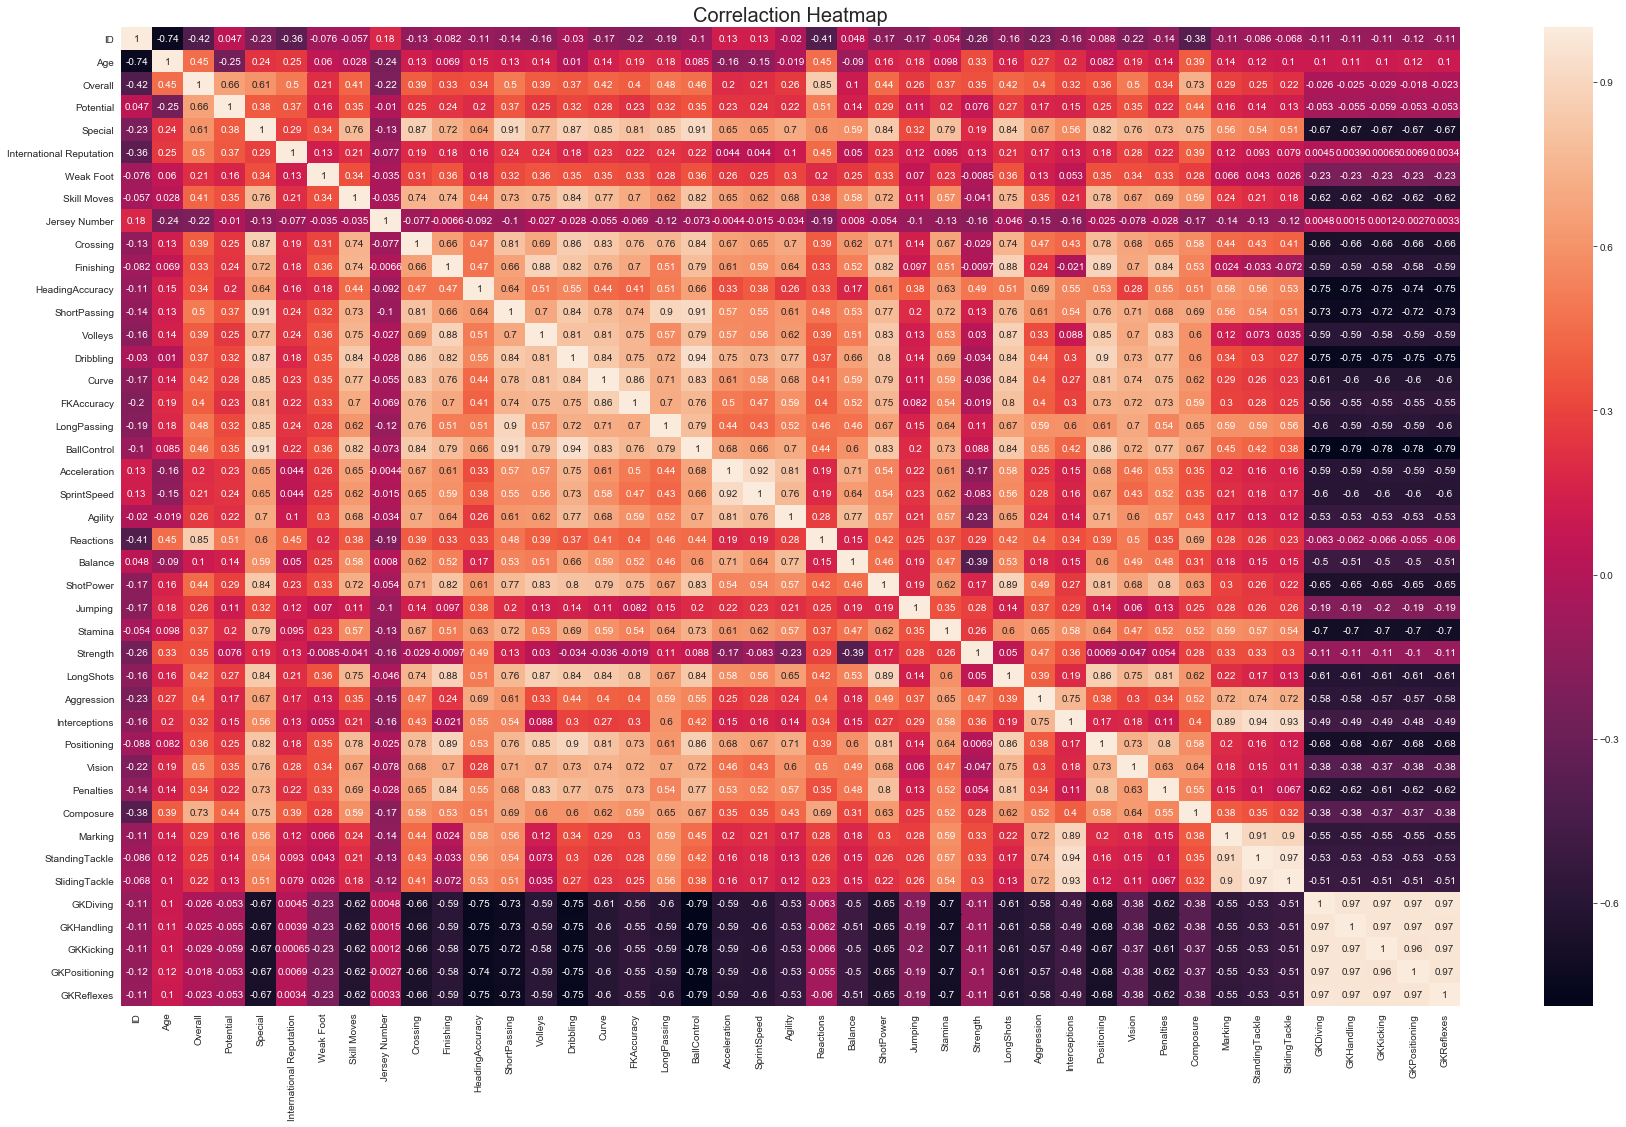

In [67]:
#Data Correlaction
data_corr= data.corr()
plt.figure(figsize= (30,18))
sns.heatmap(data= data_corr, annot= True)
plt.title('Correlaction Heatmap', fontsize= 20)
plt.show()

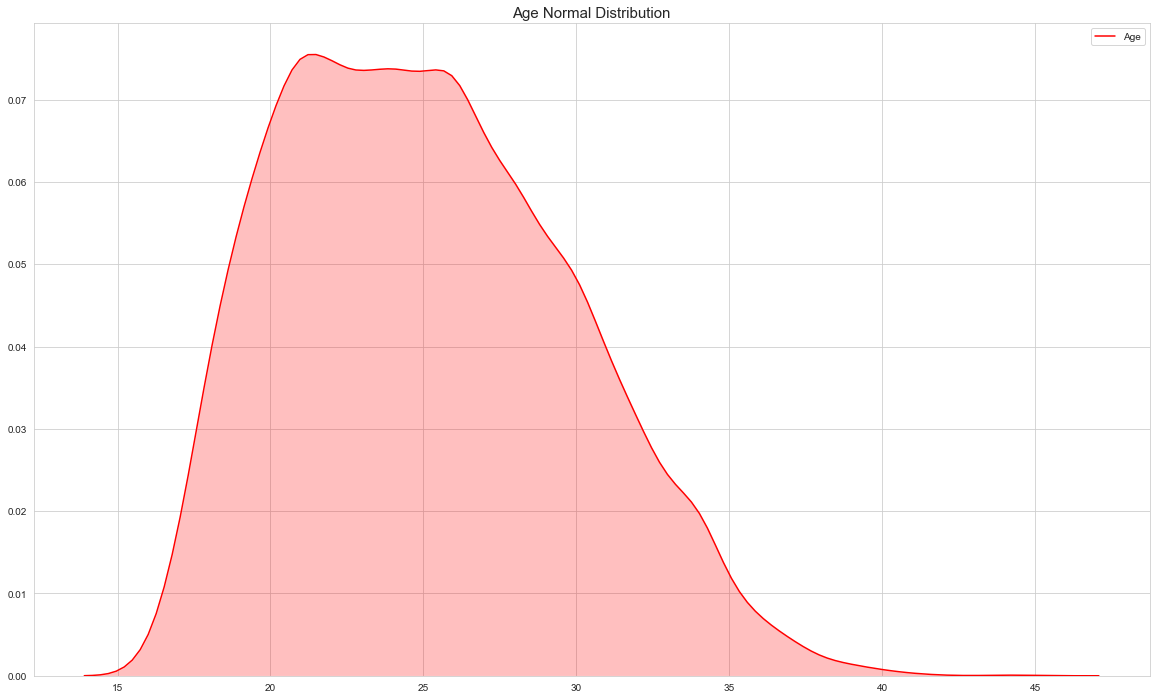

In [68]:
#Age Normal Distribution
plt.figure(figsize= (20,12))
sns.kdeplot(data=data['Age'], shade=True, color= 'red')
plt.title('Age Normal Distribution', fontsize=15)
sns.set_style("whitegrid")
plt.legend()
plt.show()

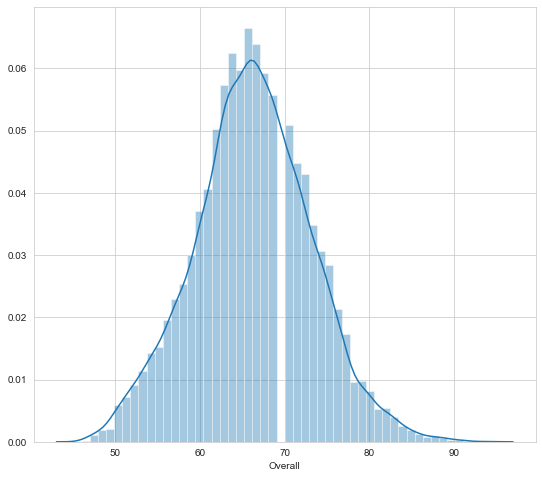

In [69]:
plt.figure(figsize=(9, 8))
sns.distplot(data.Overall)

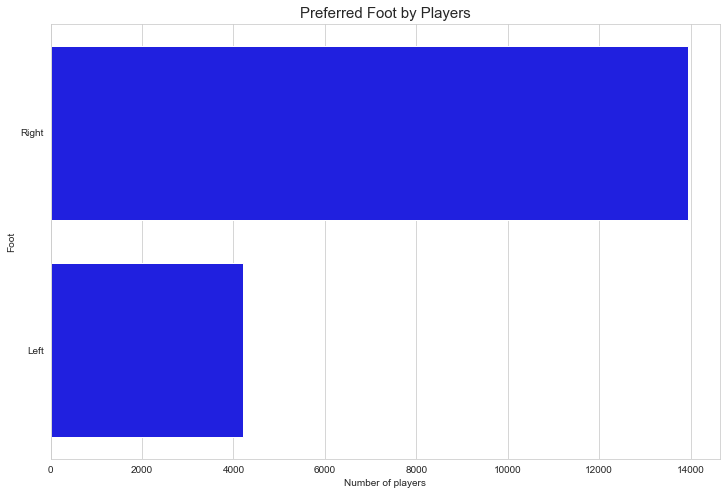

In [70]:
#Preferred Foot By Players.value_counts()
preferred =  data.Preferred_Foot.value_counts()
group3 = pd.DataFrame(preferred)
group3.reset_index(level=0, inplace=True) 
foot = group3.rename(columns={'index': 'Foot', 'Preferred_Foot': 'Number of players'})

#Plotting
plt.figure(figsize = (12,8))
sns.barplot(data= foot, x= 'Number of players', y= 'Foot' , color= 'blue')
plt.title('Preferred Foot by Players', fontsize= 15)
sns.set_style("whitegrid")
plt.show()

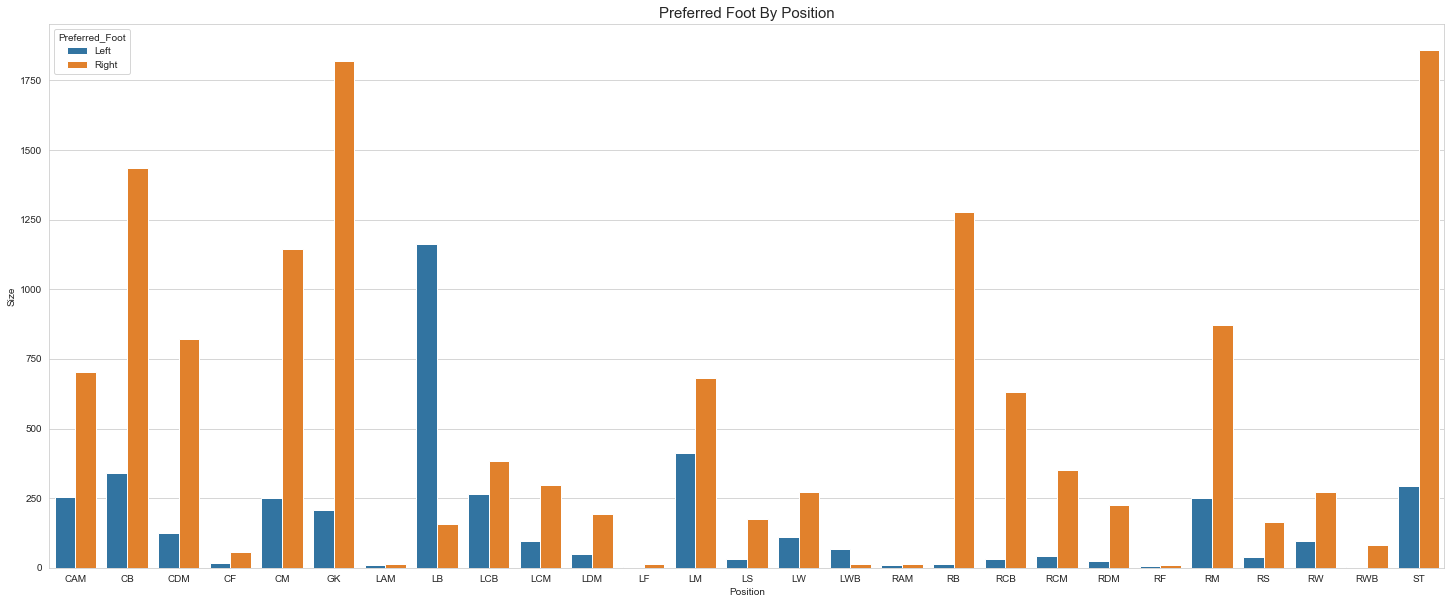

In [71]:
#Preferred Foot By Position
df_pf= data.groupby(['Preferred_Foot', 'Position']).size()
df2= pd.DataFrame(df_pf)
df3= df2.reset_index()
df3.rename(columns={0: 'Size'}, inplace=True)
df3.set_index('Preferred_Foot')

#Plotting
plt.figure(figsize = (25,10))
sns.barplot(x='Position', y="Size", hue='Preferred_Foot', data=df3) 
plt.title('Preferred Foot By Position', fontsize=15)
sns.set_style("whitegrid")
plt.show()

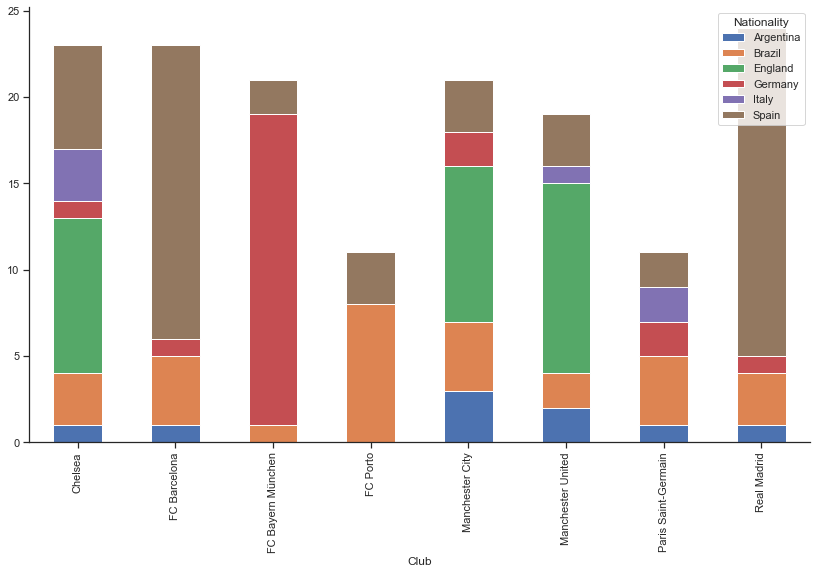

In [72]:
sns.set(style="ticks")

filtered_player_df = data[(data['Club'].isin(['FC Barcelona', 'Paris Saint-Germain',
       'Manchester United', 'Manchester City', 'Chelsea', 'Real Madrid','FC Porto','FC Bayern München'])) & 
                      (data['Nationality'].isin(['England', 'Brazil', 'Argentina',
       'Brazil', 'Italy','Spain','Germany'])) 
                     ]

df_plot = filtered_player_df.groupby(['Club', 'Nationality']).size().reset_index().pivot(columns='Club', index='Nationality', values=0).reset_index()

g = df_plot.set_index('Nationality').T.plot(kind='bar', stacked=True, 
            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14,8)
    
plt.show()

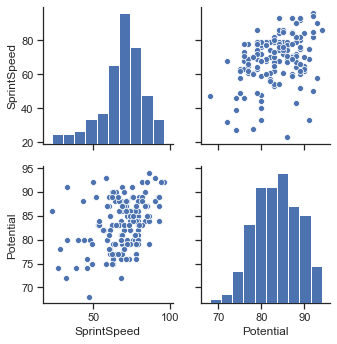

In [80]:
g = sns.pairplot(filtered_player_df[['SprintSpeed','Potential']])

# model building

In [81]:
#data preprocessing
data_no_img = data.drop(columns=["Photo", "Flag", "Club Logo", "Real Face"], axis=1) #Dropping all images

In [82]:
data_imp = data_no_img.drop(columns=["ID", "Nationality", "Club", "Preferred_Foot",
                                     "Loaned From", "Joined", "Jersey Number",
                                     "Contract Valid Until", "Name", "Work Rate",
                                     "Body Type", "Position", "Height", "Weight", 
                                     "LS", "ST", "RS", "LW", "LF", "CF", "RF", "RW",
                                     "LAM", "CAM", "RAM", "LM", "LCM", "CM", "RCM", 
                                     "RM", "LWB", "LDM", "CDM", "RDM","RWB", "LB",
                                     "LCB", "RCB", "RB", "CB"], axis=1) # dropping categorical feature

In [83]:
data_imp = data_imp.fillna(0) #imputing all the null value with 0 bcz without subject matter expert advise we can't asdsume any thing here.

In [84]:
data_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 44 columns):
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
International Reputation    18207 non-null float64
Weak Foot                   18207 non-null float64
Skill Moves                 18207 non-null float64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non-null float64
ShortPassing                18207 non-null float64
Volleys                     18207 non-null float64
Dribbling                   18207 non-null float64
Curve                       18207 non-null float64
FKAccuracy                  18207 non-null float64
LongPassing                 18207 

In [85]:
# converting Value, Wage, and Release Claues in float number
def convert_money(money):
    if money == 0:
        return float(0)
    else:
        money = money[1:] # remove "€" symbol
        unit = money[-1]
        if unit == 'K':
            value = float(money[0:-1])*1000
        elif unit == 'M':
            value = float(money[0:-1])*1000000
        else:
            value = float(money)
        return value

In [86]:
convert_money("€340K")

340000.0

In [87]:
data_imp["Wage"] = data_imp["Wage"].apply(convert_money)
data_imp["Value"] = data_imp["Value"].apply(convert_money)
data_imp["Release Clause"] = data_imp["Release Clause"].apply(convert_money)

In [88]:
#Train , test data
from sklearn.model_selection import train_test_split
y = data_imp["Value"]
x = data_imp.drop("Value", axis=1)

In [89]:
#normalization of indepentendt variable
x_norm = (x-x.mean())/x.std()

In [90]:
x_train, x_test = train_test_split(x_norm, test_size=0.2)

In [91]:
y_train, y_test = train_test_split(y, test_size=0.2)

In [92]:
#building neural network model
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import optimizers

In [93]:
model = Sequential([
    Dense(43, input_shape=(43, )),
    Activation('relu'),
    Dense(33),
    Activation('relu'),
    Dense(23),
    Activation('relu'),
    Dense(13),
    Activation('relu'),
    Dense(11),
    Activation('relu'),
    Dense(1),
    Activation('relu')
])

In [94]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 43)                1892      
_________________________________________________________________
activation_7 (Activation)    (None, 43)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 33)                1452      
_________________________________________________________________
activation_8 (Activation)    (None, 33)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 23)                782       
_________________________________________________________________
activation_9 (Activation)    (None, 23)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 13)               

In [95]:
# For a mean squared error regression problem
adam = optimizers.Adam(lr=0.003)
model.compile(optimizer=adam,
              loss='mse')

In [96]:
# Train the model, iterating on the data in batches of 64 samples
model.fit(x_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
14565/14565 [==============================] - 1s 47us/step - loss: 35833037639841.7031
Epoch 2/50
14565/14565 [==============================] - 0s 33us/step - loss: 32223714564124.2617
Epoch 3/50
14565/14565 [==============================] - 1s 44us/step - loss: 31702809543009.2148
Epoch 4/50
14565/14565 [==============================] - 1s 43us/step - loss: 31574513547899.1406
Epoch 5/50
14565/14565 [==============================] - 1s 37us/step - loss: 31500348289763.3320
Epoch 6/50
14565/14565 [==============================] - 1s 37us/step - loss: 31439420649932.3594
Epoch 7/50
14565/14565 [==============================] - 0s 34us/step - loss: 31417421033561.1484
Epoch 8/50
14565/14565 [==============================] - 1s 40us/step - loss: 31406638306255.0000
Epoch 9/50
14565/14565 [==============================] - 1s 36us/step - loss: 31381631029609.9336
Epoch 10/50
14565/14565 [==============================] - 1s 38us/step - loss: 31363891527459.5234
Epoch 11/

In [97]:
model.evaluate(x_test, y_test, batch_size=64)

3642/3642 [==============================] - 0s 16us/step


31407254449818.36

In [98]:
x_train.iloc[[0]]

,Age,Overall,Potential,Wage,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8468,1.472779,0.110191,-0.701915,0.012213,-1.752878,-0.277362,-2.866247,-1.771785,-1.922747,-1.549473,...,-0.295812,-0.906694,-1.587824,-1.474598,2.737176,2.937008,2.836653,3.032612,2.748075,-0.31577


In [99]:
y_train.iloc[[0]]

7597    1300000.0
Name: Value, dtype: float64

In [100]:
ex = x_train.iloc[[0]]

model.predict(ex)

array([[2635730.]], dtype=float32)

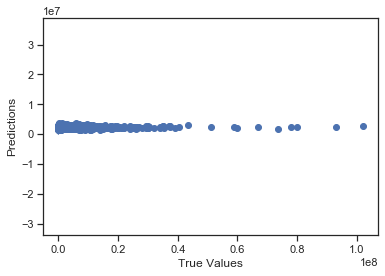

In [101]:
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])

Text(0, 0.5, 'Count')

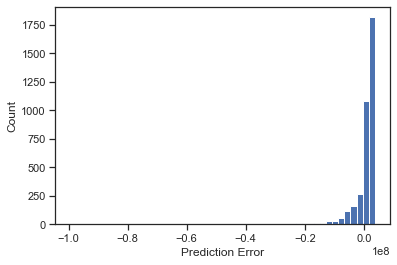

In [102]:
error = test_predictions - y_test
plt.hist(error, bins = 50)
plt.xlabel("Prediction Error")
plt.ylabel("Count")